<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/KMeansClustering/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import files
uploaded = files.upload()

Saving student_clustering.csv to student_clustering.csv


In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv('/content/student_clustering.csv')

In [56]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


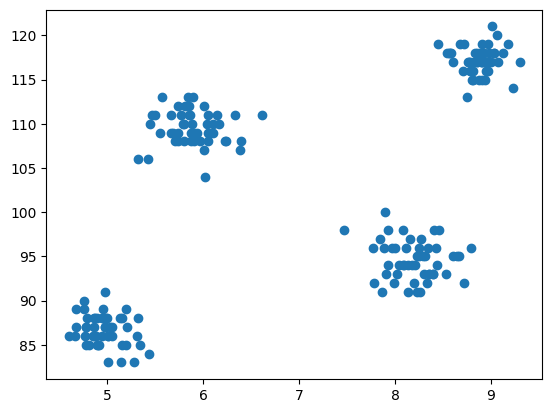

In [57]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['iq'])

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss = [] #create an empty list

for i in range(1, 11): #loop over 1 to 10 so that increasing no. of clusters
  km = KMeans(n_clusters=i) #create a KMeans model with 'i' clusters
  km.fit_predict(df) #fit model and assign each point to a cluster
  wcss.append(km.inertia_) #store the inertia(WCSS) in the list

In [60]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 556.6603823704871,
 420.74846722383296,
 435.7182707912931,
 241.63293363125763,
 301.0181803855926,
 202.39053523180476]

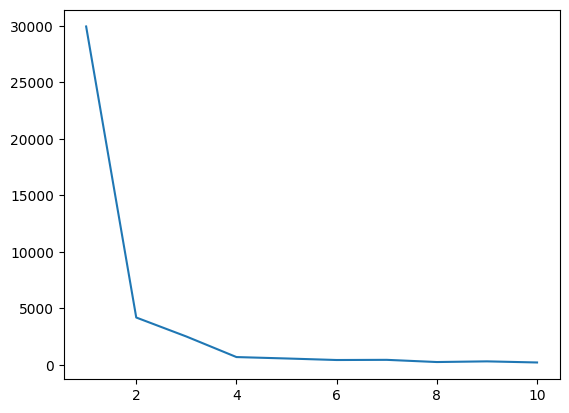

In [61]:
plt.plot(range(1, 11), wcss)

In [62]:
x = df.iloc[:, :].values
km = KMeans(n_clusters=4)
y_km = km.fit_predict(x)

In [63]:
y_km

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

In [64]:
x[y_km == 0, 0]

array([5.9 , 5.45, 5.88, 5.79, 6.1 , 5.71, 5.5 , 6.05, 5.84, 5.43, 6.01,
       5.32, 5.91, 5.57, 6.4 , 5.67, 6.05, 5.85, 5.87, 6.02, 5.77, 6.06,
       5.55, 5.81, 5.47, 5.74, 5.8 , 5.88, 5.91, 5.67, 5.74, 5.69, 6.05,
       6.14, 5.74, 5.94, 5.86, 6.38, 6.61, 6.04, 6.24, 6.1 , 5.8 , 5.87,
       5.97, 6.17, 6.01, 6.33, 5.85, 6.23])

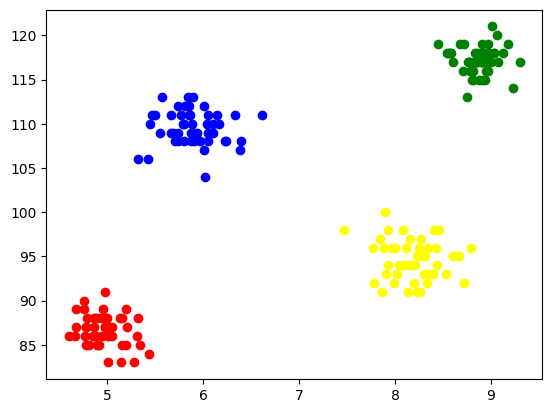

In [65]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], color='blue')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], color='red')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], color='green')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], color='yellow')

K-Means on 3D Data

In [66]:
from sklearn.datasets import make_blobs
centroids = [(-5, -5, 5), (5, 5, -5), (3.5, -2.5, 4), (-2.5, 2.5, -4)]
cluster_std = [1, 1, 1, 1] #standard deviation of each cluster
# it says the cluster is neither tighter nor too scattered

x, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

In [67]:
import plotly.express as px
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2])
fig.show()

In [68]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

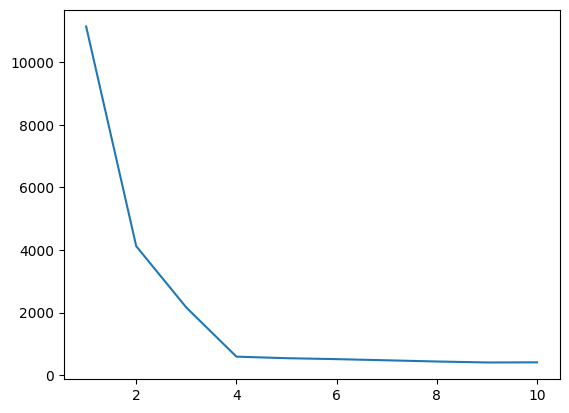

In [69]:
plt.plot(range(1, 11), wcss)

In [70]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(x)

In [71]:
df = pd.DataFrame()

df['col1'] = x[:, 0]
df['col2'] = x[:, 1]
df['col3'] = x[:, 2]

df['label'] = y_pred

In [72]:
fig = px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()

K-Means from scratch

In [107]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np
centroids = [(-5, -5), (5, 5), (-2.5, 2.5), (2.5, -2.5)]
cluster_std = [1, 1, 1, 1]

x, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

In [108]:
# plt.scatter(x[:, 0], x[:, 1])
# plt.show()

In [127]:
class KMeans:
  def __init__(self, n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self, x):
    # select random centroids
    row_random_index = random.sample(range(0, x.shape[0]), self.n_clusters)
    self.centroids = x[row_random_index]

    for i in range(self.max_iter):
      # assign clusters
      cluster_group = self.assign_clusters(x)
      old_centroids = self.centroids
      # move centroids
      self.centroids = self.move_centroids(x, cluster_group)

      # finish check
      if(old_centroids == self.centroids).all():
        break

    return cluster_group

  def move_centroids(self, x, cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)
    for type in cluster_type:
      # finding the mean of all the points with the same type
      # and finding the mean of them
      new_centroids.append(x[cluster_group == type].mean(axis=0))
    return np.array(new_centroids)

  def assign_clusters(self, x):
    cluster_group = []
    distances = []
    for row in x:
      for centroid in self.centroids:
        # euclidean distance to find the distance between current row and centroid
        distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
        # finding the minimum distance among the distances
        min_distance = min(distances)
        # after finding out the minimum distance tell the index position(of which cluster)
        index_position = distances.index(min_distance)
      cluster_group.append(index_position)
      distances.clear()

    return np.array(cluster_group)

In [128]:
km = KMeans(n_clusters=4)

In [129]:
y_km = km.fit_predict(x)

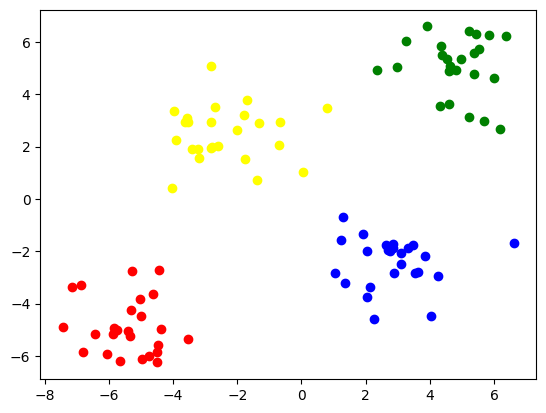

In [130]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], color='red')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], color='blue')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], color='green')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], color='yellow')
plt.show()

In [131]:
df = pd.read_csv('/content/student_clustering.csv')

In [135]:
x = df.iloc[:, :].values
km = KMeans(n_clusters=4, max_iter=100)
y_km = km.fit_predict(x)

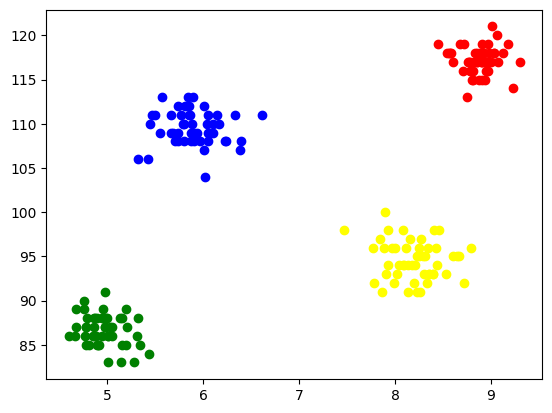

In [136]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], color='red')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], color='blue')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], color='green')
plt.scatter(x[y_km == 3, 0], x[y_km == 3, 1], color='yellow')
plt.show()